From the given dataset our concern is to find: Which Factors Influence the Price of Health Insurance?
<br>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost</br>

<br>**age:** age of primary beneficiary</br>
<br>**sex:** insurance contractor gender, female, male</br>
<br>**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9</br>
<br>**children:** Number of children covered by health insurance / Number of dependents</br>
<br>**smoker:** Smoking or not </br>
<br>**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest</br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

To check for the missing values in the dataset

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there are no missing values in the given dataset. We should not worry about data imputation and can proceed with EDA

Text(0.5, 1.0, 'Distribution of Charges')

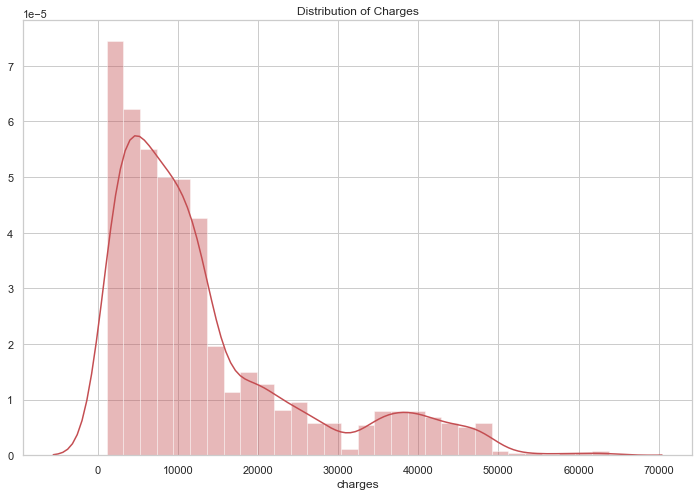

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')

So we can see that the given distribution of charges in not symmetric but right skewed

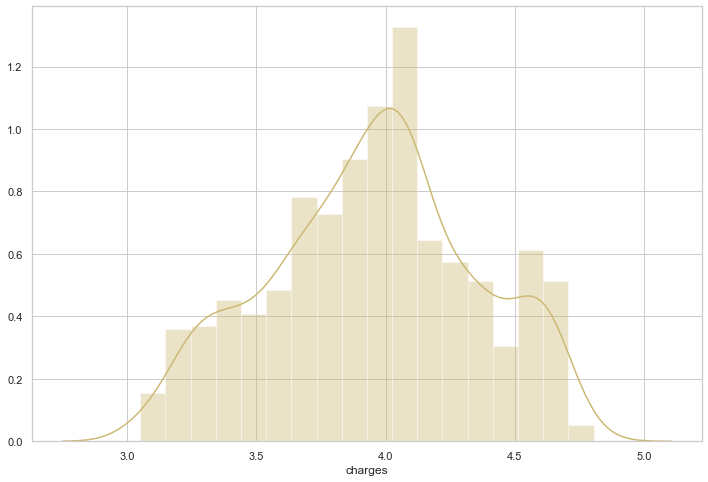

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'y' )

Since the above distribution of charges comes out to be right skewed, we can apply logarithm transformation to make it look closer to Normal distribution

In [25]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

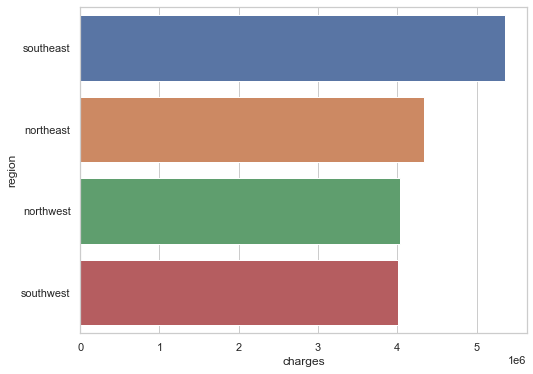

In [28]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = False)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges, charges.index)

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

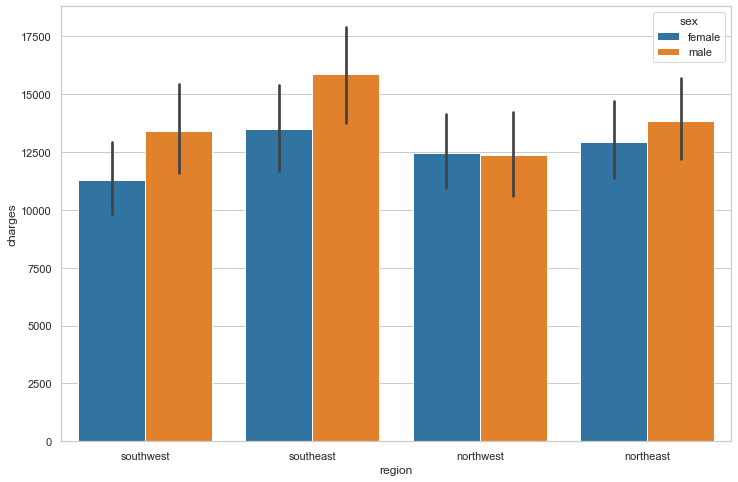

In [30]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='tab10')

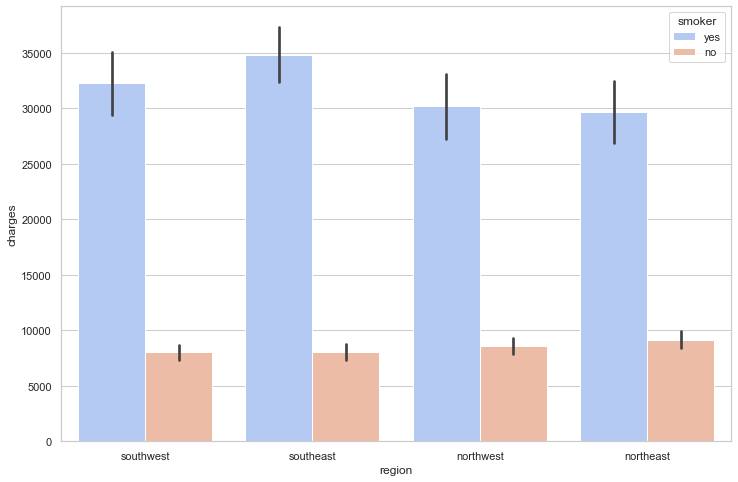

In [32]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='coolwarm')

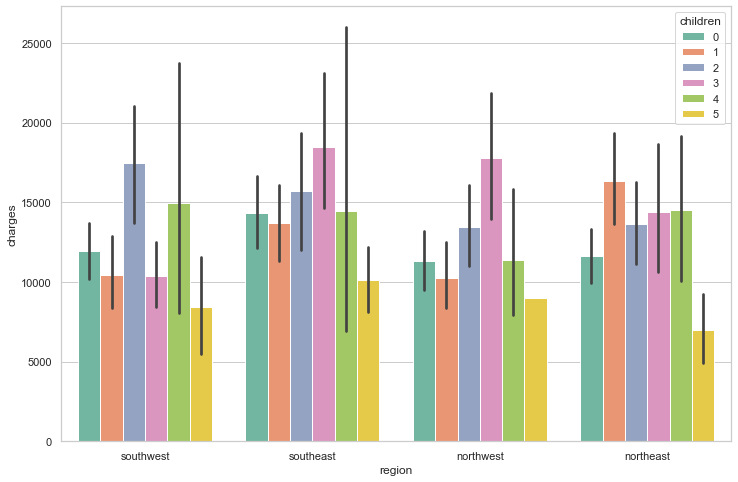

In [33]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

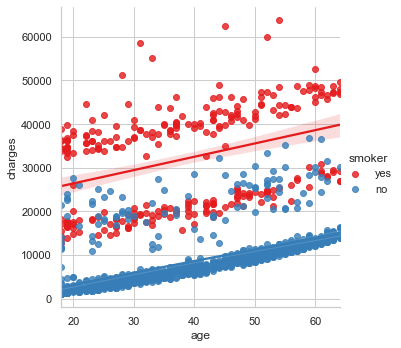

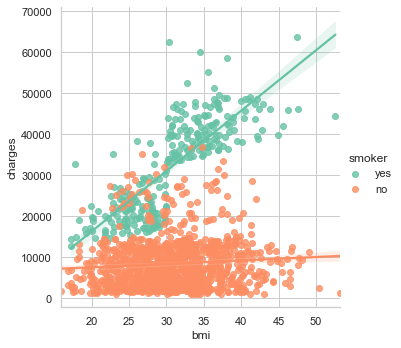

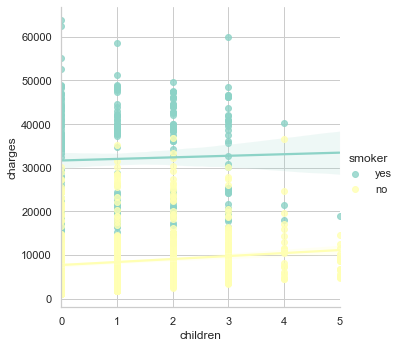

In [34]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

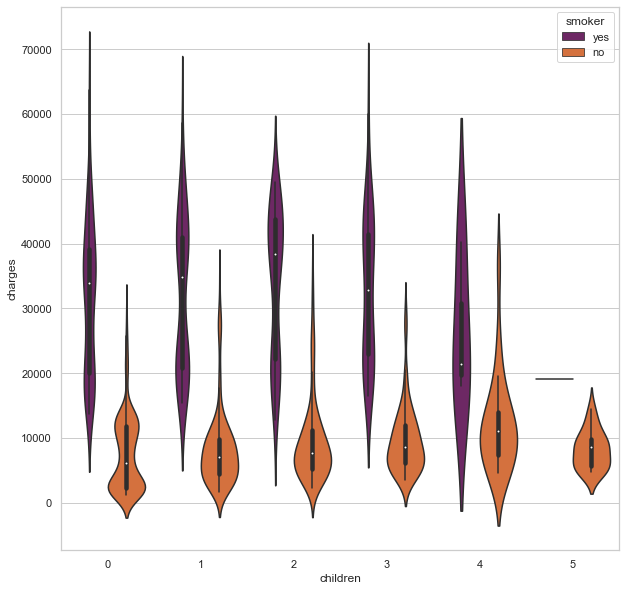

In [35]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [36]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [37]:
##Converting category labels into numerical using LabelEncoder which encode target variable with values 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

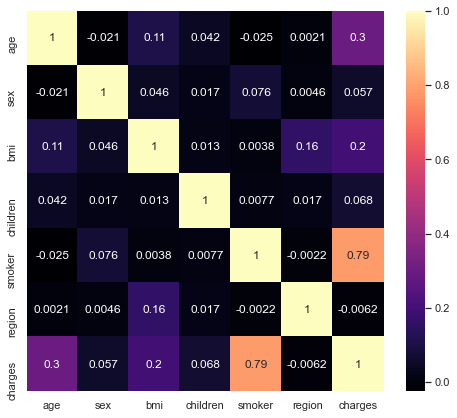

In [46]:
f, ax = plt.subplots(1, 1, figsize=(8,7))
ax = sns.heatmap(df.corr(), annot=True,cmap='magma')

We can see that there is no correlation between insurance charges and other variables except for smokers

# Linear Regression

In [67]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print("Intercept:",Lin_reg.intercept_)
print("Regression Coefficients:",Lin_reg.coef_)
y_test_pred = Lin_reg.predict(x_test)
print("r2_score:",r2_score(y_test,y_test_pred))

Intercept: -11661.983908824413
Regression Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
r2_score: 0.7998747145449959


We can try to improve our result a bit by reducing unimportant features later

# Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print("Intercept:",Ridge.intercept_)
print("Coefficients:",Ridge.coef_)
print("r2_score:",Ridge.score(x_test, y_test))

Intercept: -11643.440927495836
Coefficients: [ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
r2_score: 0.7996989632063141


# Lasso Regression

In [70]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print("Intercept:",Lasso.intercept_)
print("Coefficients:",Lasso.coef_)
print("r2_score:",Lasso.score(x_test, y_test))

Intercept: -11661.838929039533
Coefficients: [ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
r2_score: 0.7998690236224706


# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor as rf
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rf(n_estimators = 100, criterion = 'mse', random_state = 1,n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3635087.011, MSE test data: 19766481.085
R2 train data: 0.971, R2 test data: 0.877


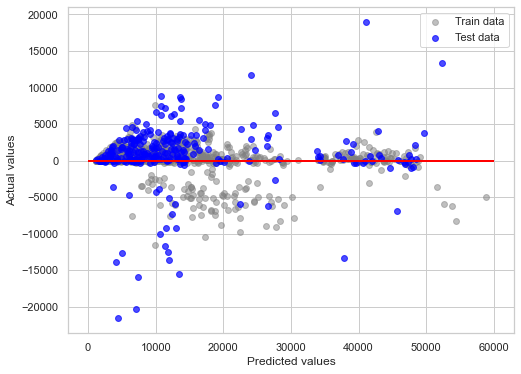

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x_train_pred, x_train_pred - y_train,c = 'gray', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218724)
3.age(0.136971)
4.children(0.021047)
5.region(0.015208)
6.sex(0.006371)


<BarContainer object of 6 artists>

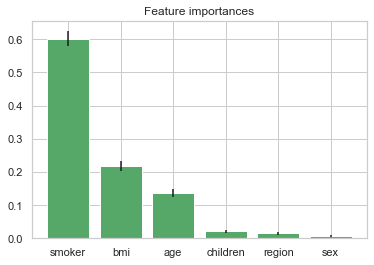

In [56]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],color="g", yerr=std[indices], align="center")

# Polynomial Regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print("Intercept:",Pol_reg.intercept_)
print("Coefficients:",Pol_reg.coef_)
print("r2_score:",Pol_reg.score(x_test, y_test))

Intercept: -5325.881705252903
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
r2_score: 0.8812595703345227


In [62]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776645
Mean Squared Error: 18895160.0987804
Root Mean Squared Error: 4346.856346692446


In [63]:
#Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
data.head()

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727


<b>Conclusion:</b> Like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age.  And Polynomial Regression turned out to be the best model

In [ ]:
# saving the model 
import pickle 
pickle_out = open("medical_insurance.pkl", mode = "wb") 
pickle.dump(Pol_reg, pickle_out) 
pickle_out.close()